In [1]:
%matplotlib notebook 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import signal

# Convolutions as the building bricks of Signal Processing
Rik's master in 45 minutes

# Convolutions are everywhere
    - Autocorrelation, cross-correlation, covariance
    - Fourier transforms, Laplace transforms, Z-transforms
    - Convolutional neural networks 
    - Autoregressive moving average (ARMA) filters 
    - Lens blur, edge detection
    - Audio equalizers 
    - Smoothing signals 
    - Decoding MRI's
    

## Convolution is defined as:
    
$$ \Large (f * g)(t) \triangleq\ \int_{-\infty}^\infty f(x) g(t - x) \, dx\ $$

It 'blends' two signals together

## Convolution is defined as:
    
<img src=https://mahfuzdotsite.files.wordpress.com/2018/12/convolution_anim1.gif width="700">


## Convolution is defined as:
    
<img src=convolution_still.png width="700">


In [2]:
def plot_convolutions(x, y, conv):
    plt.figure(figsize=(4,4))
    ax = plt.subplot(3, 1, 1)
    plt.plot(np.arange(len(x)), x)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.grid()
    plt.subplot(3, 1, 2, sharey=ax, sharex=ax)
    plt.plot(np.arange(len(y)), y)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.grid()
    plt.subplot(3, 1, 3, sharex=ax)
    plt.plot(np.arange(len(conv)), conv)
    plt.grid()
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.show()

<IPython.core.display.Javascript object>


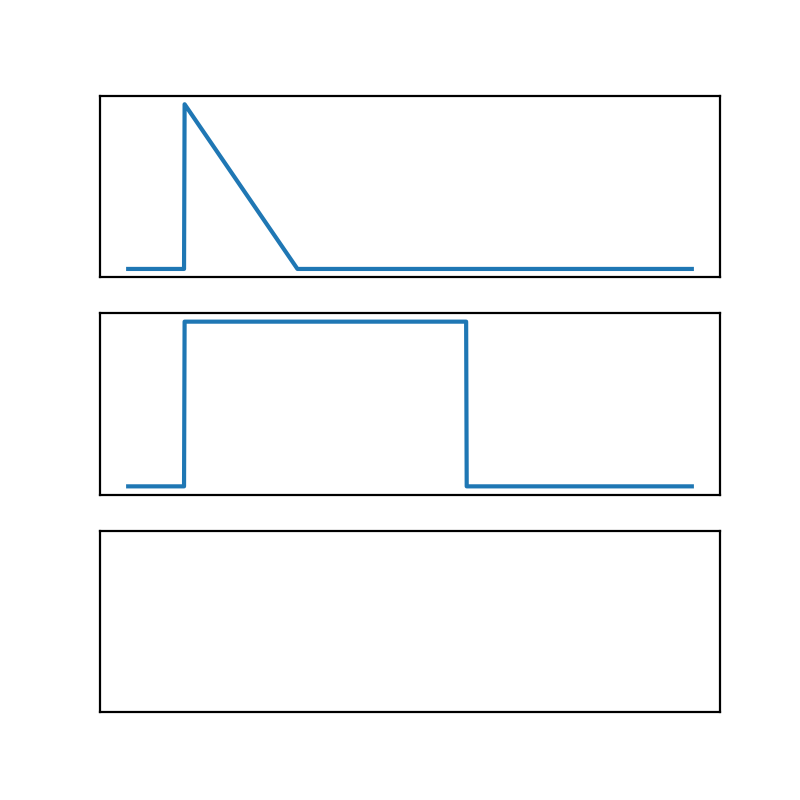

In [3]:
block_length = 500

x = np.concatenate((np.zeros(100), np.arange(200,0,-1)/200, np.zeros(700)))
y = np.concatenate((np.zeros(100), np.ones(block_length), np.zeros(900-block_length)))
conv = signal.convolve(x, y, mode='valid')

plot_convolutions(x, y, conv)


# Convolution modes
    
<img src=Convolution_modes.png width=500px>


<IPython.core.display.Javascript object>


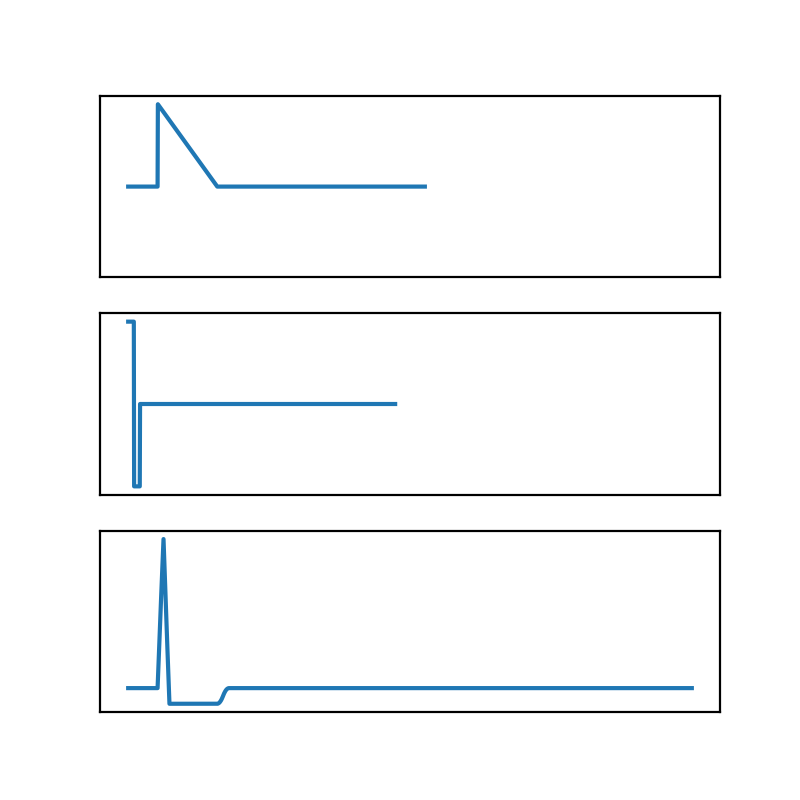

In [4]:
block_length = 40
x = np.concatenate((np.zeros(100), np.arange(200,0,-1)/200, np.zeros(700)))
y = np.concatenate((np.ones(block_length//2), -np.ones(block_length//2), np.zeros(900-block_length)))
conv = signal.convolve(x, y, mode='full')

plot_convolutions(x, y, conv)

In [5]:
def plot_sines(y, conv):
    plt.figure(figsize=(5,5))
    y_ticks = range(0,6)

    
    plt.subplot(2, 1, 1)
    plt.step(np.arange(len(y)), y)
    plt.gca().set_yticks(y_ticks)
    plt.grid()

    ax = plt.gca()
    plt.subplot(2, 1, 2, sharex=ax)
    plt.plot(np.arange(-len(x)+1, len(y)), conv)
    plt.grid()
    plt.show()

In [6]:
fir_bandpass = np.array([
-0.15451353743543042,
-0.013973503687699985,
-0.014484254200294363,
-0.014915785652620856,
-0.0152497239177544,
-0.015485478555259316,
-0.01564370523081293,
-0.015715104683924563,
-0.015639458769746255,
-0.015506440181804488,
-0.01524803651372971,
-0.014882945588179607,
-0.014409302569953202,
-0.01383852964262781,
-0.01315081339197502,
-0.012357638292970425,
-0.011476473630363578,
-0.010485735970999655,
-0.009405285950140136,
-0.008239095582201717,
-0.007004187592358195,
-0.005671133113532717,
-0.0043020833415886904,
-0.0028724006375737913,
-0.001384989119548792,
0.00013143808164881198,
0.001670017425982376,
0.003203873180537547,
0.0049700638428365985,
0.0062519261568872745,
0.007881380906108772,
0.009484952608896214,
0.010985346379620837,
0.012398544678414612,
0.013763916104465763,
0.015071982766267755,
0.016212969208344974,
0.017383051348518884,
0.01841979472618944,
0.019364917546489443,
0.020204971081955365,
0.020937694631695387,
0.021537066627739805,
0.022003900318827464,
0.02235503416279212,
0.022554385666310448,
0.022622431925965,
0.022554385666310448,
0.02235503416279212,
0.022003900318827464,
0.021537066627739805,
0.020937694631695387,
0.020204971081955365,
0.019364917546489443,
0.01841979472618944,
0.017383051348518884,
0.016212969208344974,
0.015071982766267755,
0.013763916104465763,
0.012398544678414612,
0.010985346379620837,
0.009484952608896214,
0.007881380906108772,
0.0062519261568872745,
0.0049700638428365985,
0.003203873180537547,
0.001670017425982376,
0.00013143808164881198,
-0.001384989119548792,
-0.0028724006375737913,
-0.0043020833415886904,
-0.005671133113532717,
-0.007004187592358195,
-0.008239095582201717,
-0.009405285950140136,
-0.010485735970999655,
-0.011476473630363578,
-0.012357638292970425,
-0.01315081339197502,
-0.01383852964262781,
-0.014409302569953202,
-0.014882945588179607,
-0.01524803651372971,
-0.015506440181804488,
-0.015639458769746255,
-0.015715104683924563,
-0.01564370523081293,
-0.015485478555259316,
-0.0152497239177544,
-0.014915785652620856,
-0.014484254200294363,
-0.013973503687699985,
-0.15451353743543042])

In [7]:
def plot_bandpass(y, conv):
    plt.figure(figsize=(5,5))
    y_ticks = range(0,6)

    plt.subplot(2, 1, 1)
    plt.step(np.arange(len(y)), y)
    plt.gca().set_yticks(y_ticks)
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.plot(conv)
    plt.grid()
    plt.show()

<IPython.core.display.Javascript object>


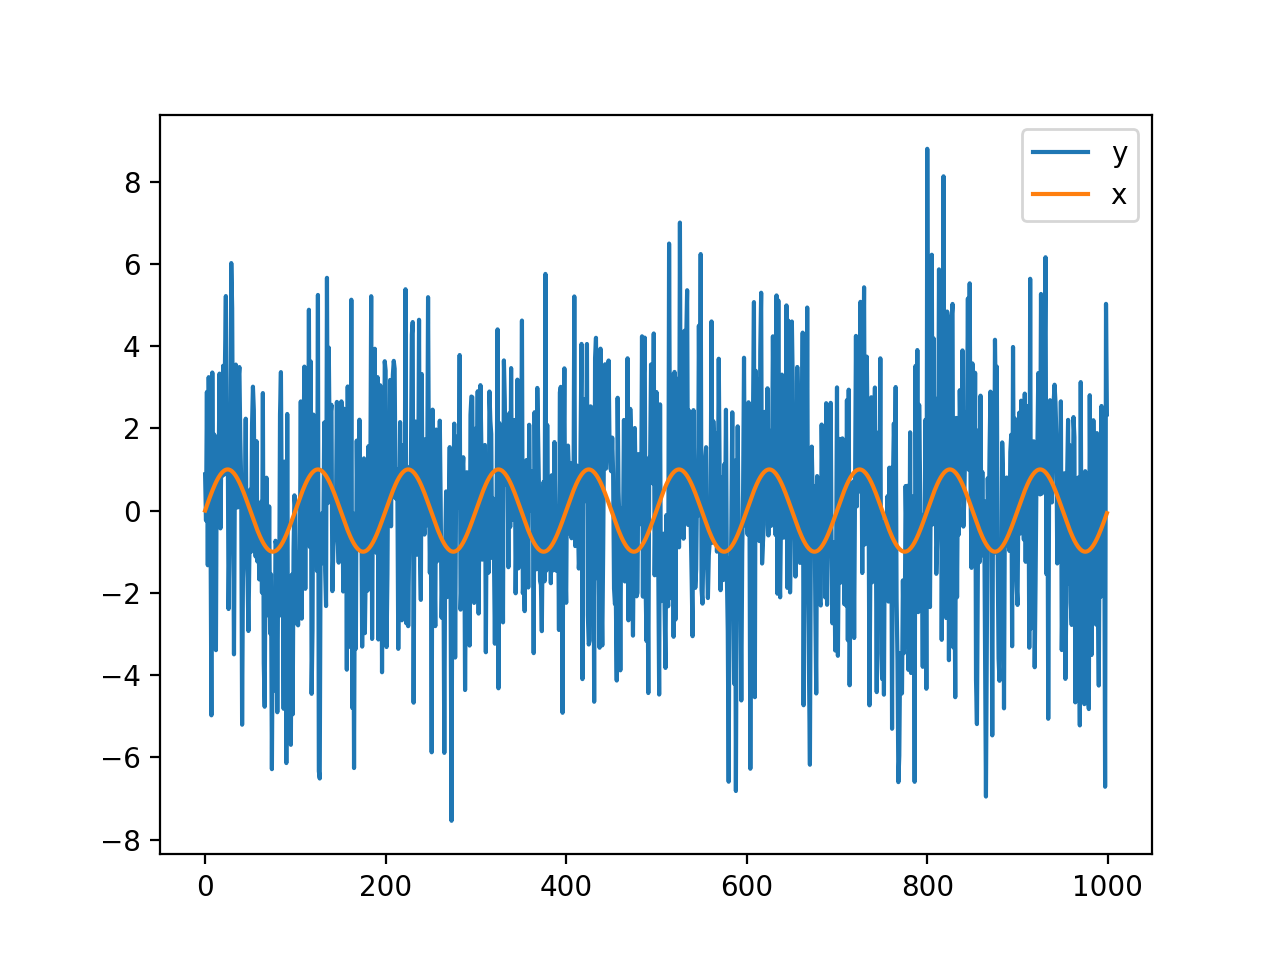

In [8]:
sigma = 2.5
period = 100
N_SAMPLES = 1000
t = np.arange(0, N_SAMPLES)
x = np.sin(t*2*np.pi/period)
y = x + sigma*np.random.randn(len(x))
plt.figure()
plt.plot(y, label="y")
plt.plot(x, label="x")
plt.legend()

<IPython.core.display.Javascript object>


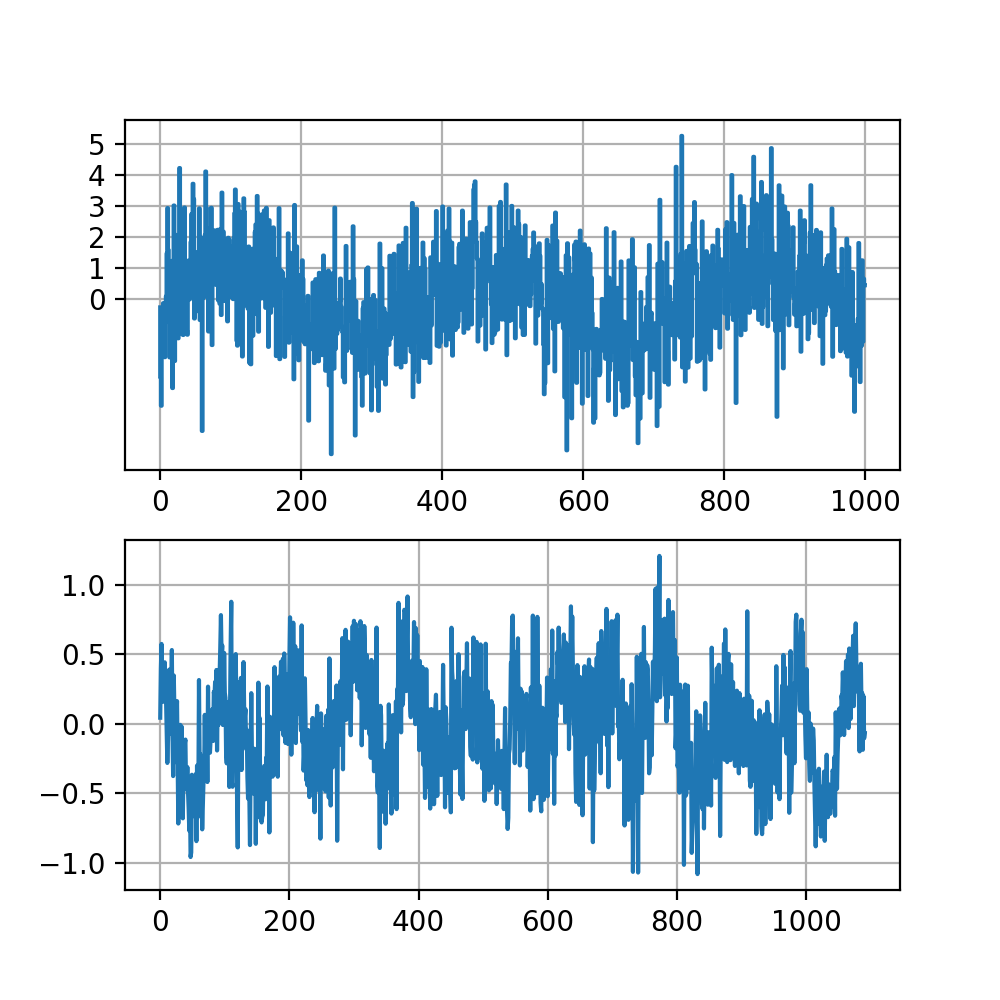

In [9]:
sigma = 1.5
period = 378
N_SAMPLES = 1000
t = np.arange(0, N_SAMPLES)
x = np.sin(t*2*np.pi/period)
y = x + sigma*np.random.randn(len(x))

conv = signal.convolve(y, fir_bandpass, mode='full')

plot_bandpass(y, conv)

# ARMA filters
Autoregressive and moving average: 
    - Autoregressive means convolution of input with filter
    - Moving average means convolution of output with filter

$$ y(n) = \sum_{m = 0}^M a^*(m)x(n-m) + \sum_{k = 1}^K b^*(k)y(n-k) $$ 

## Autocorrelation

<IPython.core.display.Javascript object>


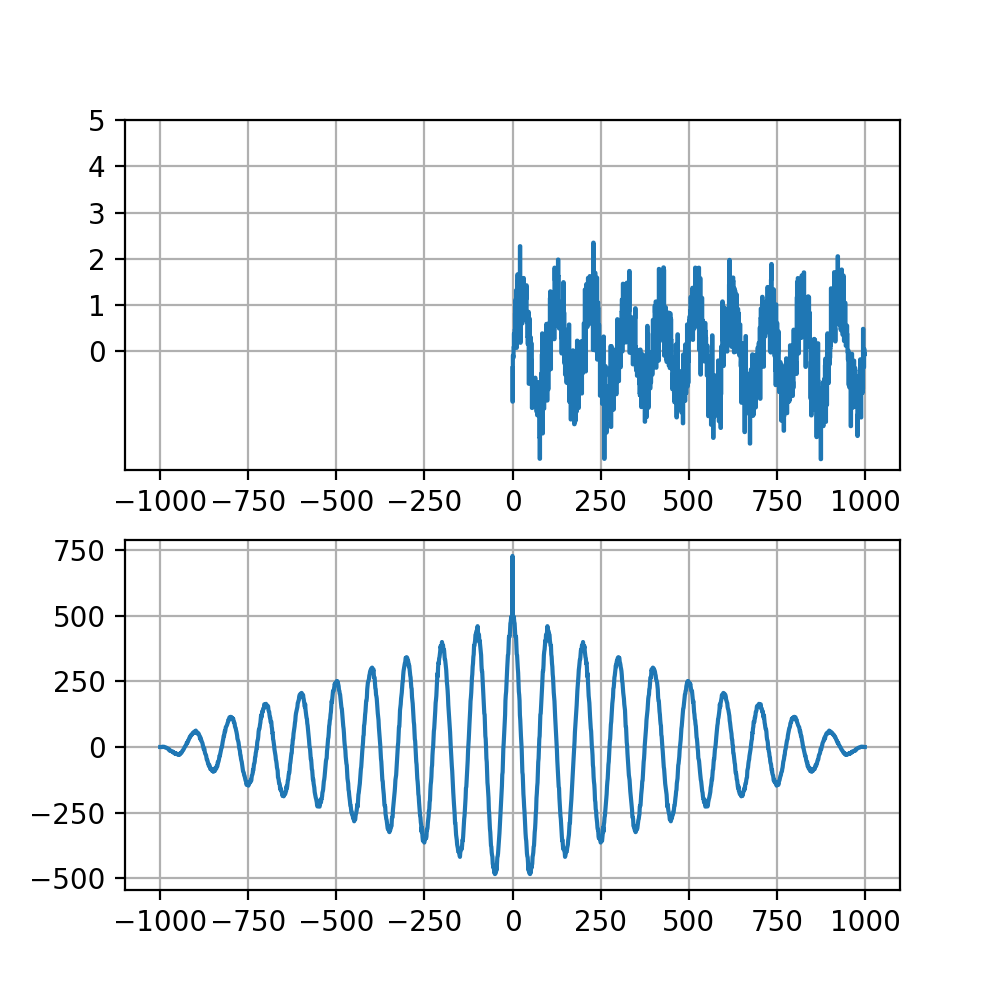

In [10]:
sigma = 0.5
period = 100
N_SAMPLES = 1000
t = np.arange(0, N_SAMPLES)
x = np.sin(t*2*np.pi/period)
y = x + sigma*np.random.randn(len(x))

conv = signal.convolve(y, y[::-1], mode='full')

plot_sines(y, conv)

## DIY Fourier transform

<img src=fourier_recipe.png width=1000px>


In [11]:
def reverse_signal(x):
    return x[::-1]

def correlate(x, y):
    return signal.convolve(x, reverse_signal(y))

def generate_sine(period, nsamples):
    return np.sin(np.arange(nsamples)*2*np.pi/period)

def max_correlation(x, y):
    return np.max(correlate(x,y))

<IPython.core.display.Javascript object>


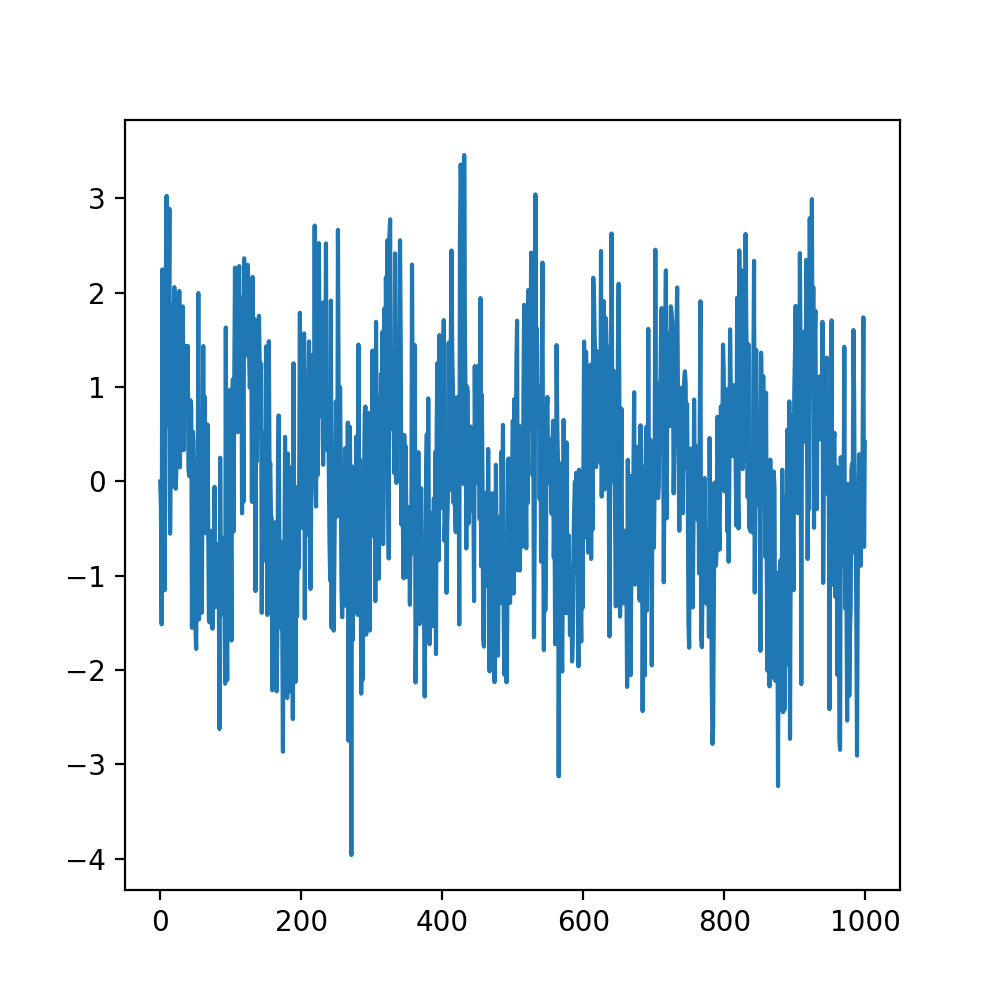

In [12]:
plt.figure(figsize=(5,5))

x = generate_sine(period=100, nsamples=1000)
y = x + np.random.randn(len(x))

plt.plot(y)

<IPython.core.display.Javascript object>


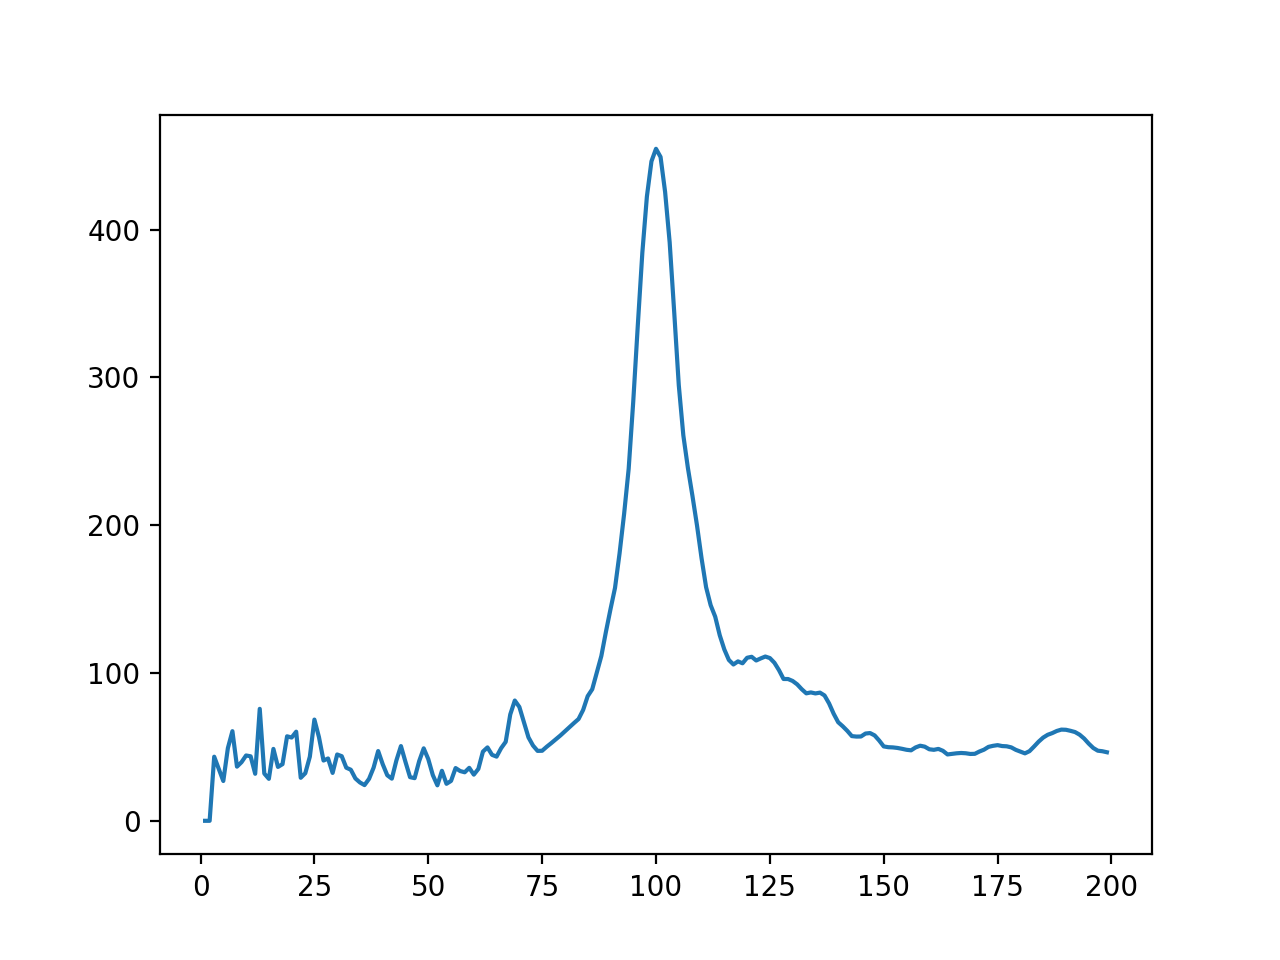

In [13]:
NSAMPLES = 1000
true_period = 100
y = generate_sine(true_period, NSAMPLES) + np.random.randn(NSAMPLES)
periods = np.arange(1, 200)
correlations = []

for period in periods:
    x = generate_sine(period, NSAMPLES)
    c = max_correlation(x, y)
    correlations.append(c)

plt.figure()
plt.plot(periods, correlations)

<IPython.core.display.Javascript object>


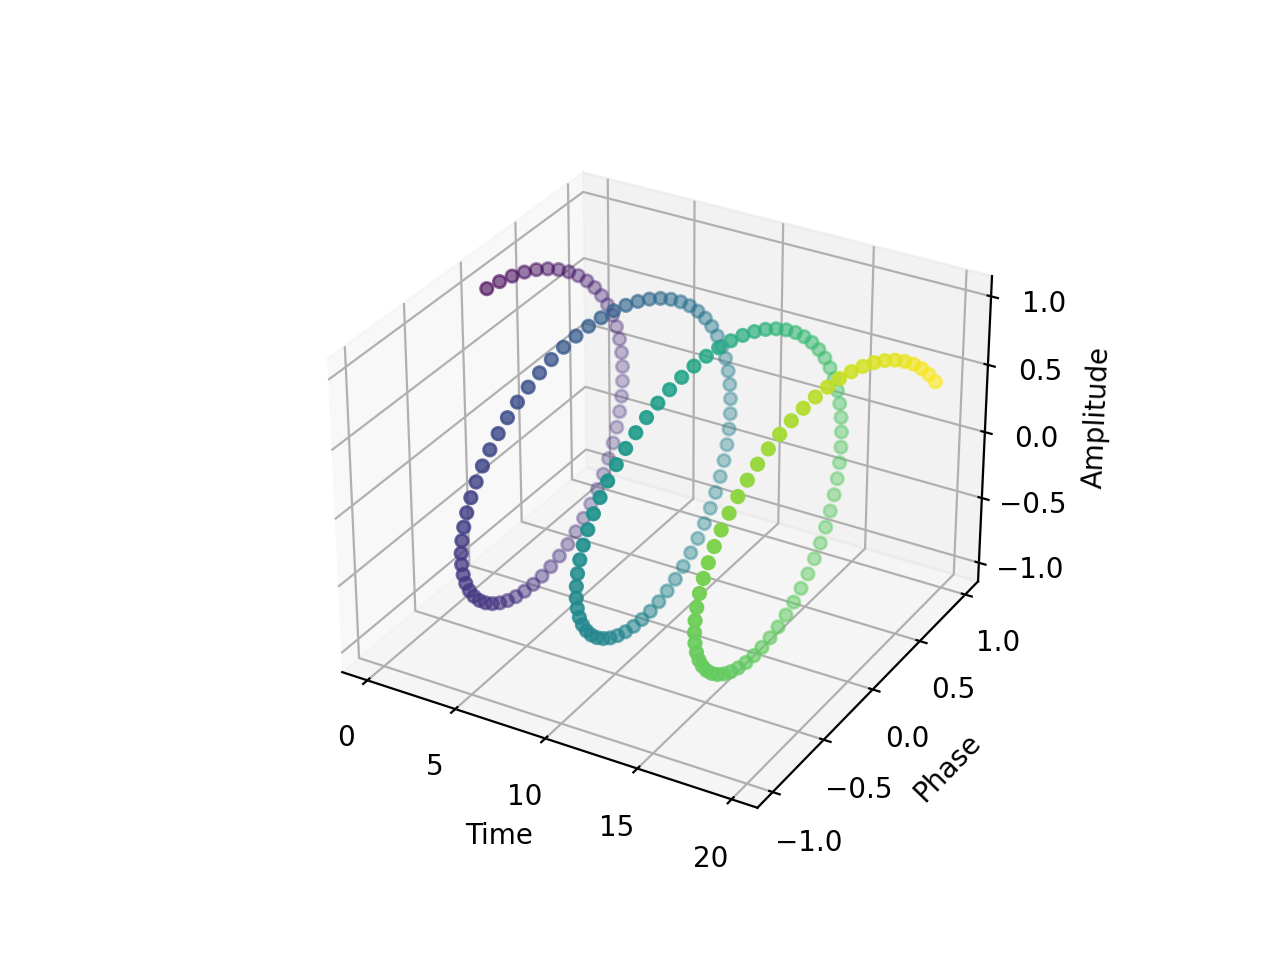

Text(0.5, 0, 'Amplitude')

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = np.arange(0, 20, 0.1)
y = np.sin(x)
z = np.cos(x)

fig = plt.figure()
ax = plt.axes(projection='3d')

c = x + y

ax.scatter(x, y, z, c=c)
ax.set_xlabel("Time")
ax.set_ylabel("Phase")
ax.set_zlabel("Amplitude")

